# Analysis of French listed historical monuments

#### <br> *Download the open data CSV file [here](https://www.data.gouv.fr/fr/datasets/immeubles-proteges-au-titre-des-monuments-historiques/#_) and rename it mh.csv*

#### <br> Load the file with all historical monuments

In [2]:
import pandas as pd
df = pd.read_csv('mh.csv', sep=';')
nb_lines = df['Région'].count()
df.head()

,Région,Département,Commune,Appellation courante,Siecle,AUTEUR,Précision sur la Protection,Date de Protection,Statut,Adresse,INSEE,AFFECTATAIRE,ETUDE,Référence,Coordonnées INSEE,Code département,Ancienne région,Région normalisée
0,Grand-Est,Ardennes,Remilly-Aillicourt,Château,3e quart 18e siècle,NaN,Façades et toitures du corps de bâtiment centr...,1984/04/03 : inscrit MH,Propriété d'une personne privée,Grande-Rue (),08357,NaN,Recensement immeubles MH,PA00078484,"49.6485856467, 4.99371291541",08,Champagne-Ardenne,champagne ardenne
1,Grand-Est,Ardennes,Mont-Dieu (Le),Chartreuse (ancienne),17e siècle,NaN,Ancienne chartreuse à l'exception des parties ...,1927/02/28 : inscrit MH ; 1946/07/30 : classé MH,Propriété d'une personne privée,NaN,08300,NaN,Recensement immeubles MH,PA00078465,"49.5494900352, 4.85937044031",08,Champagne-Ardenne,champagne ardenne
2,Grand-Est,Ardennes,Hierges,Croix,4e quart 16e siècle,NaN,Croix datée du 1er mai 1579 : inscription par ...,1926/10/18 : inscrit MH,Propriété d'une personne privée,Sur la place Nord du Village,08226,NaN,Recensement immeubles MH,PA00078452,"50.0988093717, 4.73380069028",08,Champagne-Ardenne,champagne ardenne
3,Grand-Est,Ardennes,Hierges,Eglise Saint-Jean-Baptiste,4e quart 16e siècle,NaN,Mur de soutènement du cimetière (cad. A 63) : ...,1987/06/09 : inscrit MH ; 1993/02/11 : classé MH,Propriété de la commune,NaN,08226,NaN,Recensement immeubles MH,PA00078453,"50.0988093717, 4.73380069028",08,Champagne-Ardenne,champagne ardenne
4,Grand-Est,Ardennes,Novy-Chevrières,"Eglise Sainte-Catherine, dite aussi Eglise Sai...",3e quart 17e siècle;18e siècle,NaN,Eglise : classement par arrêté du 16 août 1912,1912/08/16 : classé MH,propriété de la commune,NaN,08330,NaN,Recensement immeubles MH,PA00078479,"49.5461151318, 4.44233077955",08,Champagne-Ardenne,champagne ardenne


#### <br> Map to 18 French regions (2016) data (population on 01/01/18 by INSEE)

In [3]:
regions_dict = {'Ile-de-France':[12011,12246234], 'Auvergne-Rhône-Alpes':[69711,8037059], 'Hauts-De-France':[31813,6023336], 
                'Nouvelle-Aquitaine':[84061,5994336], 'Occitanie':[72724,5903190], 'Grand-Est':[57433,5548090],
                "Provence-Alpes-Côte d'Azur":[31400,5065723],'Pays de la Loire':[32082,3787411], 'Normandie':[29906,3342467],
                'Bretagne':[27208,3336643], 'Bourgogne-Franche-Comté':[47784,2813289],'Centre-Val de Loire':[39151,2582522],
                'Réunion':[2504,865826], 'Guadeloupe':[1628,390704], 'Martinique':[1128,371246],'Corse':[8722,337796],
                'Guyane':[83846,281612],'Mayotte':[376,259154]} # surface area, population number
df_region = df[df['Région'].isin(regions_dict.keys())]
nb_lines_regions = df_region.shape[0]
print(nb_lines_regions, " historical monuments mapped to 18 French regions (2016) and ", nb_lines-nb_lines_regions,
     " monuments not mapped (Saint-Pierre-et-Miquelon or input errors)")

45175  historical monuments mapped to 18 French regions (2016) and  16  monuments not mapped (Saint-Pierre-et-Miquelon or input errors)


#### <br> Display the number of historical monuments for each of the 18 French regions

In [4]:
df_region['Région'].value_counts()

Nouvelle-Aquitaine            6197
Occitanie                     4839
Auvergne-Rhône-Alpes          4809
Grand-Est                     4547
Ile-de-France                 3861
Bourgogne-Franche-Comté       3653
Hauts-De-France               3131
Bretagne                      3111
Normandie                     3040
Centre-Val de Loire           2793
Provence-Alpes-Côte d'Azur    2265
Pays de la Loire              2119
Corse                          316
Réunion                        184
Guadeloupe                     110
Martinique                     110
Guyane                          85
Mayotte                          5
Name: Région, dtype: int64

##### Display the distribution with a pie chart

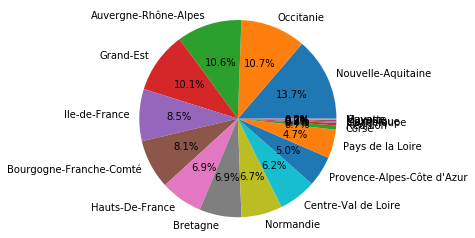

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
region_serie = df_region['Région'].value_counts()
region_index = region_serie.index.values.tolist()
region_count = region_serie.values.tolist()
region_percent_list = [x / np.sum(region_count) for x in region_count]
plt.pie(region_percent_list, labels=region_index, autopct='%1.1f%%')
plt.axis('equal')
plt.savefig('regions.png')
plt.show()

##### *Such a chart can be considered biaised due to the various surface area and population number of regions. Therefore the two following pie charts present the same information taking into account these parameters*

##### Distribution taking into account the surface area of regions

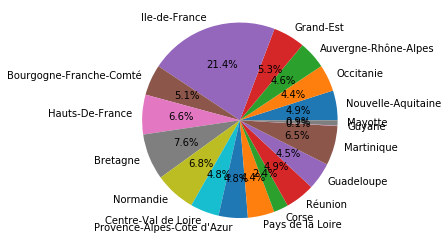

In [6]:
region_count = [x / regions_dict[y][0] for x,y in zip(region_count,region_index)]
region_percent_list = [x / np.sum(region_count) for x in region_count]
plt.pie(region_percent_list, labels=region_index, autopct='%1.1f%%')
plt.axis('equal')
plt.savefig('regions.png')
plt.show()

##### Distribution taking into account the population number

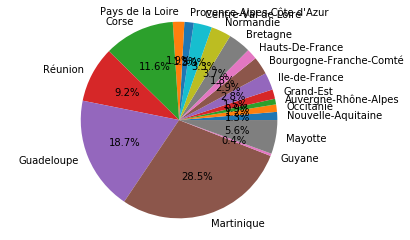

In [7]:
region_count = [x / regions_dict[y][1] for x,y in zip(region_count,region_index)]
region_percent_list = [x / np.sum(region_count) for x in region_count]
plt.pie(region_percent_list, labels=region_index, autopct='%1.1f%%')
plt.axis('equal')
plt.savefig('regions.png')
plt.show()

#### <br> Top 20 cities where French historical monuments are located

In [8]:
df['Commune'].value_counts().nlargest(20)

Bordeaux                    376
Rochelle (La)               293
Nancy                       262
Paris 4e Arrondissement     253
Paris 1er Arrondissement    246
Lyon                        239
Strasbourg                  229
Rouen                       228
Arras                       227
Dijon                       212
Lille                       210
Toulouse                    206
Paris 6e Arrondissement     195
Besançon                    191
Clermont-Ferrand            178
Orléans                     161
Avignon                     160
Aix-en-Provence             156
Tours                       149
Paris 7e Arrondissement     143
Name: Commune, dtype: int64

#### <br> Types of historical monuments listed

##### *Different designations are equivalent and should be grouped. For instance churches can be named Eglise, eglise, église etc.*

In [9]:
df['Appellation courante'].value_counts().nlargest(10)

Maison                  2931
Eglise                  2635
Immeuble                2308
Château                 1193
Eglise Saint-Martin      454
Eglise Notre-Dame        389
Eglise Saint-Pierre      387
Hôtel de ville           187
Croix                    167
Eglise Saint-Etienne     136
Name: Appellation courante, dtype: int64

##### What type of monument in a given city (ex: La Rochelle)?

In [10]:
df[df['Commune'] == 'Rochelle (La)']['Appellation courante'].value_counts().nlargest(10)

Maison                              236
Immeuble                              2
Hôtel                                 2
Maisons                               2
Chapelle de l'Espérance               1
Ancien Hôtel du Commerce              1
Maison dite du Maire Jean Guiton      1
Château                               1
Gare                                  1
Porte Dauphine                        1
Name: Appellation courante, dtype: int64

##### For each region, what type of monument is listed?

In [11]:
for name, group in df_region.groupby('Région'):
    print('-----------------')
    print(name)
    print(group['Appellation courante'].value_counts().nlargest(2))

-----------------
Auvergne-Rhône-Alpes
Maison    299
Eglise    213
Name: Appellation courante, dtype: int64
-----------------
Bourgogne-Franche-Comté
Eglise    358
Maison    272
Name: Appellation courante, dtype: int64
-----------------
Bretagne
Maison      309
Immeuble     56
Name: Appellation courante, dtype: int64
-----------------
Centre-Val de Loire
Maison      260
Immeuble     92
Name: Appellation courante, dtype: int64
-----------------
Corse
Eglise paroissiale    5
Eglise                5
Name: Appellation courante, dtype: int64
-----------------
Grand-Est
Maison    488
Eglise    440
Name: Appellation courante, dtype: int64
-----------------
Guadeloupe
Eglise            4
Roches gravées    3
Name: Appellation courante, dtype: int64
-----------------
Guyane
Immeuble    5
Maison      3
Name: Appellation courante, dtype: int64
-----------------
Hauts-De-France
Eglise      446
Immeuble    215
Name: Appellation courante, dtype: int64
-----------------
Ile-de-France
Immeuble    639
E

#### <br> Top 10 most listed architects

In [12]:
df['AUTEUR'].value_counts().nlargest(10)

Gabriel Jacques (architecte) ; Gabriel Ange-Jacques (architecte)                              116
Vauban Sébastien Le Prestre de, marquis (ingénieur militaire)                                  55
GUIMARD Hector (maître de l'oeuvre)                                                            50
Besneville Pierre (architecte)                                                                 26
Riquet Pierre-Paul (ingénieur)                                                                 24
GUIMARD Hector (architecte)                                                                    23
Garengeau (ingénieur)                                                                          20
Percilly (architecte)                                                                          13
Jeanneret Charles-Edouard, dit Le Corbusier (architecte) ; Jeanneret Pierre (architecte)       12
Jeanneret Charles-Edouard, dit : Le Corbusier (architecte) ; Jeanneret Pierre (architecte)     12
Name: AUTEUR, dtype:

#### <br> The only monument shared by two departments (two regions actually) is:

In [13]:
df[df['Région'].str.contains(' ; ')].head()

,Région,Département,Commune,Appellation courante,Siecle,AUTEUR,Précision sur la Protection,Date de Protection,Statut,Adresse,INSEE,AFFECTATAIRE,ETUDE,Référence,Coordonnées INSEE,Code département,Ancienne région,Région normalisée
32996,Rhône-Alpes ; Bourgogne,Rhône-Alpes ; Bourgogne,Saint-Laurent-sur-Saône ; Mâcon,"Pont Saint-Laurent, sur la Saône",11e siècle;14e siècle;18e siècle;19e siècle,NaN,Le pont (cad. non cadastré) : classement par a...,1987/07/06 : classé MH,propriété de l'Etat,NaN,01370 ; 71270,ministère chargé de l'équipement et du logement,recensement immeubles MH,PA00116558,NaN,01 ; 71,Rhône-Alpes ; Bourgogne,rhone alpes ; bourgogne


#### Total number of churches/cathedrals/castles listed?

In [16]:
church_list = df[df['Appellation courante'].str.contains('[Eeé]glise')]['Référence'].value_counts().index.values.tolist()
print(len(church_list), " churches found")

10404  churches found


In [18]:
cathe_list = df[df['Appellation courante'].str.contains('[Cc]ath[eé]drale')]['Référence'].value_counts().index.values.tolist()
print(len(cathe_list), " cathedrals found")

172  cathedrals found


In [19]:
castle_list = df[df['Appellation courante'].str.contains('[Cc]h[aâ]teau')]['Référence'].value_counts().index.values.tolist()
print(len(castle_list), " castles found")

5980  castles found


#### <br> Regions with most churches/cathedrals listed?

In [20]:
df[df['Appellation courante'].str.contains('[Eeé]glise')]['Région'].value_counts().nlargest(5)

Nouvelle-Aquitaine      1914
Occitanie               1159
Grand-Est               1116
Auvergne-Rhône-Alpes    1035
Hauts-De-France          880
Name: Région, dtype: int64

In [21]:
df[df['Appellation courante'].str.contains('[Cc]ath[eé]drale')]['Région'].value_counts().nlargest(5)

Occitanie                     34
Provence-Alpes-Côte d'Azur    25
Auvergne-Rhône-Alpes          18
Nouvelle-Aquitaine            14
Grand-Est                     13
Name: Région, dtype: int64

#### <br> Regions/departments with most castles listed

In [96]:
df[df['Appellation courante'].str.contains('[Cc]h[aâ]teau')]['Région'].value_counts().nlargest(3)

Nouvelle-Aquitaine      1013
Auvergne-Rhône-Alpes     867
Occitanie                731
Name: Région, dtype: int64

In [97]:
df[df['Appellation courante'].str.contains('[Cc]h[aâ]teau')]['Département'].value_counts().nlargest(5)

Dordogne          198
Allier            162
Maine-et-loire    145
Indre-et-loire    144
Gironde           140
Name: Département, dtype: int64

#### <br> Focus on Occitanie

In [55]:
df[df['Région']=='Occitanie']['Commune'].value_counts().nlargest(20)

Toulouse                    206
Montpellier                 112
Nîmes                        91
Narbonne                     64
Mirepoix                     58
Beaucaire                    51
Carcassonne                  48
Montauban                    43
Cahors                       42
Uzès                         42
Pézenas                      39
Albi                         37
Béziers                      35
Perpignan                    34
Mende                        32
Rodez                        30
Villefranche-de-Conflent     29
Villefranche-de-Rouergue     28
Cordes-sur-Ciel              26
Auvillar                     26
Name: Commune, dtype: int64

In [26]:
df[df['Commune']=='Toulouse']['Appellation courante'].value_counts().nlargest(5)

Immeuble                             42
Maison en terre cuite de Virebent     4
Hôtel                                 3
Maison                                3
Hôtel Réquy                           1
Name: Appellation courante, dtype: int64